In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
pwd

'C:\\Users\\afrid'

In [4]:
dataset=pd.read_csv(r"D:\Downloads\USA_Housing.csv")

In [5]:
print(dataset)

      Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
0         79545.458574             5.682861                   7.009188   
1         79248.642455             6.002900                   6.730821   
2         61287.067179             5.865890                   8.512727   
3         63345.240046             7.188236                   5.586729   
4         59982.197226             5.040555                   7.839388   
...                ...                  ...                        ...   
4995      60567.944140             7.830362                   6.137356   
4996      78491.275435             6.999135                   6.576763   
4997      63390.686886             7.250591                   4.805081   
4998      68001.331235             5.534388                   7.130144   
4999      65510.581804             5.992305                   6.792336   

      Avg. Area Number of Bedrooms  Area Population         Price  \
0                             4.09     230

In [6]:
dataset.shape

(5000, 7)

In [11]:
dataset.dtypes

Avg. Area Income                float64
Avg. Area House Age             float64
Avg. Area Number of Rooms       float64
Avg. Area Number of Bedrooms    float64
Area Population                 float64
Price                           float64
Address                          object
dtype: object

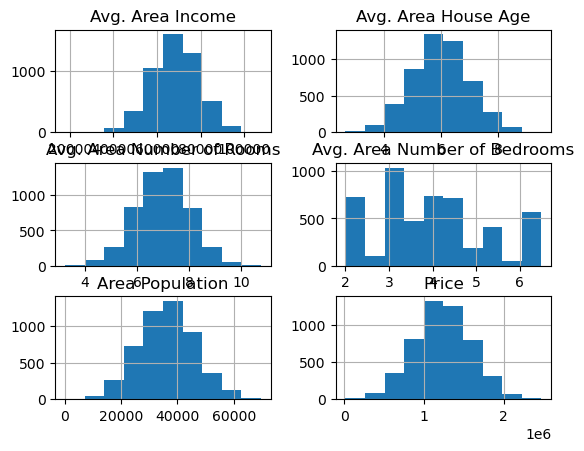

In [12]:
# Data visualization
from matplotlib import pyplot
dataset.hist()
pyplot.show()

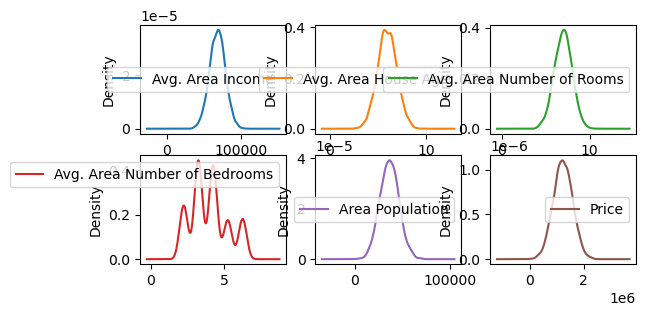

In [13]:
# Data visualization
dataset.plot(kind='density' ,subplots=True, layout=(3,3), sharex=False)
pyplot.show()

In [14]:
dataset.isnull().sum()

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
Address                         0
dtype: int64

In [15]:
# Extracting dependent and independent variables:
# Extracting independent variable:
X = dataset.iloc[:,0:4].values
# Extracting dependent variable:
y = dataset.iloc[:, 5].values

In [16]:
print(X)

[[7.95454586e+04 5.68286132e+00 7.00918814e+00 4.09000000e+00]
 [7.92486425e+04 6.00289981e+00 6.73082102e+00 3.09000000e+00]
 [6.12870672e+04 5.86588984e+00 8.51272743e+00 5.13000000e+00]
 ...
 [6.33906869e+04 7.25059061e+00 4.80508098e+00 2.13000000e+00]
 [6.80013312e+04 5.53438842e+00 7.13014386e+00 5.44000000e+00]
 [6.55105818e+04 5.99230531e+00 6.79233610e+00 4.07000000e+00]]


In [17]:
print(y)

[1059033.55787012 1505890.91484695 1058987.98787608 ... 1030729.58315229
 1198656.87240769 1298950.48026696]


In [18]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .25, random_state = 0)

In [19]:
# Fitting Simple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

In [20]:
print('Train Score: %f' %(regressor.score(X_train, y_train))) 
print('Test Score: %f' % (regressor.score(X_test, y_test)) )
if (regressor.score(X_train, y_train)) > (regressor.score(X_test, y_test)):
  print("Overfitting")
else:
  print("Underfitting")

Train Score: 0.734894
Test Score: 0.737840
Underfitting


In [23]:
print("Regressor slope:  %2.f  "%( regressor.coef_[0]))
print("Regressor intercept:%2.f  "% regressor.intercept_)

Regressor slope:  21  
Regressor intercept:-2061107  


In [28]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error: %.2f' % mae)

Mean Absolute Error: 146794.18


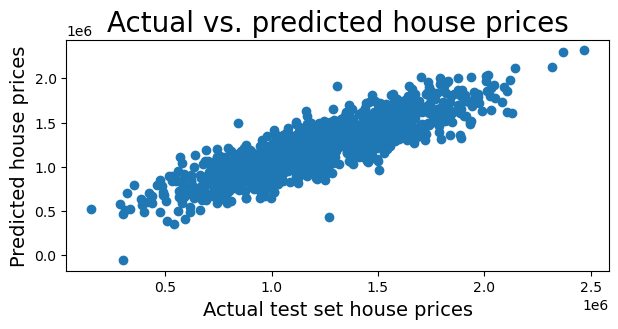

In [33]:
plt.figure(figsize=(7,3))
plt.title("Actual vs. predicted house prices",fontsize=20)
plt.xlabel("Actual test set house prices",fontsize=14)
plt.ylabel("Predicted house prices", fontsize=14)
plt.scatter(x=y_test,y=y_pred)